Team Members
Libin Kutty - Group 2
Ritu Gahir - Group 3
Viju Sudhi - Group 10

In [0]:
%tensorflow_version 2.x

In [0]:
pip install tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/Colab Notebook/IDL/"

datasets.py		IDL_Assingnment_1.ipynb  logs	      tf_data.ipynb
IDL_Assignment_2.ipynb	linear_tb.ipynb		 __pycache__


In [5]:
import os
print(os.getcwd())

/content


In [0]:
os.chdir("/content/drive/My Drive/Colab Notebook/IDL/")

In [9]:
print(os.getcwd())

/content/drive/My Drive/Colab Notebook/IDL


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

The cell is used to calculate the loss/error between the predicted label and the truth label

In [0]:
def loss(logits, labels):
  return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=labels))

Linear Model just for understanding

In [0]:
class Linear_Model():
  def __init__(self):

    self.W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
    self.b = tf.Variable(np.zeros(10, dtype=np.float32))

    self.loss = 0.0
    self.accuracy = 0.0

  def train(self, inputs, outputs, learning_rate):
    
    with tf.GradientTape() as t:
      logits = tf.matmul(inputs, self.W) + self.b
      self.loss = loss(logits, outputs)

    dW, db = t.gradient(self.loss, [self.W, self.b])


    self.W.assign_sub(learning_rate * dW)
    self.b.assign_sub(learning_rate * db)

    preds = tf.argmax(logits, axis=1, output_type=tf.int32)
    self.accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, outputs),
                             tf.float32))


Multi-Layer Perceptron with one hidden layers

Initializing the weights to 0 will lead to no learning, as weights are multiplied to input, inputs will have no relevance while training. It will affect the gradient.
When we tried to train the network by initializing the weights to 0, we observed that the accuracy(which was very less) was same for all epochs which means the model was not able to learn.
It seems that since weights are same which is zero, all the weights will follow the same gradient.

In [0]:
class MLP_Model(object):
  def __init__(self):

    self.W = tf.Variable(tf.random.uniform(shape=[784,300], minval=-0.1, maxval=0.1, dtype=np.float32))
    self.b = tf.Variable(np.zeros(300, dtype=np.float32))
#    self.b = tf.Variable(tf.random.uniform(shape=[20], minval=0, maxval=1, dtype=np.float32))


    self.W2 = tf.Variable(tf.random.uniform(shape=[300,200], minval=-0.1, maxval=0.1, dtype=np.float32))
    self.b2 = tf.Variable(np.zeros(200, dtype=np.float32))
#    self.b2 = tf.Variable(tf.random.uniform(shape=[10], minval=0, maxval=1, dtype=np.float32))

    self.W3 = tf.Variable(tf.random.uniform(shape=[200,10], minval=-0.1, maxval=0.1, dtype=np.float32))
    self.b3 = tf.Variable(np.zeros(10, dtype=np.float32))

    self.loss = 0.0
    self.accuracy = 0.0

  def train(self, inputs, outputs, learning_rate):

    with tf.GradientTape() as t:
      # Hidden layer
      l1 = tf.add(tf.matmul(inputs, self.W), self.b)
      l1_op = tf.nn.relu(l1)

      # Hidden layer 2
      l2 = tf.add(tf.matmul(l1_op, self.W2), self.b2)
      l2_op = tf.nn.relu(l2)

      #Output Layer
      l3 = tf.add(tf.matmul(l2_op, self.W3), self.b3)
      y_pred = tf.nn.softmax(l3)

      #logits = tf.matmul(inputs, self.W) + self.b
      self.loss = loss(y_pred, outputs)

    dW3, db3, dW2, db2, dW, db = t.gradient(self.loss, [self.W3, self.b3, self.W2, self.b2, self.W, self.b])
    self.W3.assign_sub(learning_rate * dW3)
    self.b3.assign_sub(learning_rate * db3)

    self.W2.assign_sub(learning_rate * dW2)
    self.b2.assign_sub(learning_rate * db2)

    self.W.assign_sub(learning_rate * dW)
    self.b.assign_sub(learning_rate * db)

    preds = tf.argmax(y_pred, axis=1, output_type=tf.int32)
    self.accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, outputs),
                             tf.float32))


The code where we create layer and apply gradient should be wrapped in higher level interface as adding more layer will make it complicated to write and to read.

In [14]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)


11493376/11490434 [==============================] - 0s 0us/step


In [15]:
model = Linear_Model()
batch_size = 128
steps = range(1000)
for step in steps:

  img_batch, lbl_batch = data.next_batch()
  model.train(img_batch, lbl_batch, learning_rate=0.1)
  if not step % 100:
    print('Step %2d: loss=%2.5f, accuracy=%2.5f' %
        (step, model.loss, model.accuracy))



Step  0: loss=2.30259, accuracy=0.07812
Step 100: loss=0.64844, accuracy=0.84375
Step 200: loss=0.42093, accuracy=0.89844
Step 300: loss=0.39157, accuracy=0.92188
Step 400: loss=0.51051, accuracy=0.85938
Starting new epoch...
Step 500: loss=0.36307, accuracy=0.89062
Step 600: loss=0.30236, accuracy=0.92188
Step 700: loss=0.35297, accuracy=0.88281
Step 800: loss=0.34929, accuracy=0.89844
Step 900: loss=0.46001, accuracy=0.85156
Starting new epoch...


In [16]:
test_preds = tf.argmax(tf.matmul(data.test_data, model.W) + model.b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)
print(data.test_labels[0], test_preds[0])

tf.Tensor(0.9102, shape=(), dtype=float32)
7 tf.Tensor(7, shape=(), dtype=int32)


In [17]:
mlp_model = MLP_Model()

batch_size = 128
steps = range(1000)
for step in steps:
  img_batch, lbl_batch = data.next_batch()
  
  #import ipdb; ipdb.set_trace()   # For Debugging
  mlp_model.train(img_batch, lbl_batch, learning_rate=0.1)
  if not step % 100:
    print('Step %2d: loss=%2.5f, accuracy=%2.5f' %
        (step, mlp_model.loss, mlp_model.accuracy))


Step  0: loss=2.30232, accuracy=0.07031
Step 100: loss=2.23877, accuracy=0.28125
Step 200: loss=1.90202, accuracy=0.66406
Step 300: loss=1.71085, accuracy=0.84375
Step 400: loss=1.67510, accuracy=0.82031
Starting new epoch...
Step 500: loss=1.61747, accuracy=0.90625
Step 600: loss=1.62688, accuracy=0.84375
Step 700: loss=1.60560, accuracy=0.87500
Step 800: loss=1.61662, accuracy=0.85938
Starting new epoch...
Step 900: loss=1.55775, accuracy=0.92969


In [18]:
test_preds_h1 = tf.matmul(data.test_data, mlp_model.W) + mlp_model.b
test_preds_h2 = tf.matmul(test_preds_h1, mlp_model.W2) + mlp_model.b2
test_preds = tf.argmax(tf.matmul(test_preds_h2, mlp_model.W3) + mlp_model.b3, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)
print(data.test_labels[50], test_preds[50])

tf.Tensor(0.8999, shape=(), dtype=float32)
6 tf.Tensor(6, shape=(), dtype=int32)


Average Accuracy over Class Accuracy:  0.8977455838850489


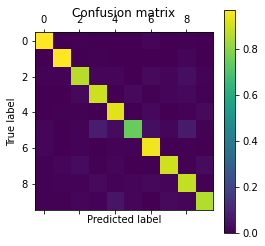

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(data.test_labels,test_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sum = 0
count = 0
for i in cm.diagonal():
    sum = sum + i
    count = count + 1

average = sum / count

print("Average Accuracy over Class Accuracy: ",average)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Experiments with hidden layer unit, weights and activation function

Experiment 1

---

> Weights = -0.1 to 0.1
Hidden Layer Units - 100 
Activation Function - ReLU and Softmax 
Training Accuracy = 82%  Testing Accuracy = 83%

Experiment 2

---
> Weights = -0.1 to 0.1
Hidden Layer Units - 200
Activation Function - ReLU and Softmax 
Training Accuracy = 85%  Testing Accuracy = 88%

Experiment 3

---
> Weights = -0.1 to 0.1
Hidden Layer Units - 300
Activation Function - ReLU and Softmax 
Training Accuracy = 89%  Testing Accuracy = 88%

Experiment 4

---
> Weights = -0.1 to 0.1
Hidden Layer Units - 300
Activation Function - Tanh and Sigmoid 
Training Accuracy = 90%  Testing Accuracy = 88%

Experiment 5

---
> Weights = 0 to 0.1
Hidden Layer Units - 300
Activation Function - Tanh and Sigmoid 
Training Accuracy = 07%  Testing Accuracy = 09%

Experiment 6

---
> Weights = -0.2 to 0.2
Hidden Layer Units - 300
Activation Function - ReLU and Softmax 
Training Accuracy = 80%  Testing Accuracy = 80%


In [21]:
fs_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fs_mnist.load_data()

fs_mnist_data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

4423680/4422102 [==============================] - 0s 0us/step


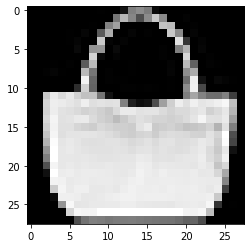

In [22]:
plt.imshow(train_images[100], cmap="Greys_r")

In [23]:
mlp_fs_model = MLP_Model()

batch_size = 128
steps = range(1000)
for step in steps:
  fs_img_batch, fs_lbl_batch = fs_mnist_data.next_batch()
  #import ipdb; ipdb.set_trace()   # For Debugging

  mlp_fs_model.train(fs_img_batch, fs_lbl_batch, learning_rate=0.1)
  if not step % 100:
    print('Step %2d: loss=%2.5f, accuracy=%2.5f' %
      (step, mlp_fs_model.loss, mlp_fs_model.accuracy))

Step  0: loss=2.30204, accuracy=0.07812
Step 100: loss=2.04050, accuracy=0.50000
Step 200: loss=1.85486, accuracy=0.67969
Step 300: loss=1.80325, accuracy=0.69531
Step 400: loss=1.79183, accuracy=0.69531
Starting new epoch...
Step 500: loss=1.66402, accuracy=0.82031
Step 600: loss=1.66979, accuracy=0.82031
Step 700: loss=1.65721, accuracy=0.80469
Step 800: loss=1.68725, accuracy=0.78906
Step 900: loss=1.70375, accuracy=0.76562
Starting new epoch...


In [27]:
test_preds_fs_h = tf.matmul(fs_mnist_data.test_data, mlp_fs_model.W) + mlp_fs_model.b
test_preds_fs_h2 = tf.matmul(test_preds_fs_h, mlp_fs_model.W2) + mlp_fs_model.b2
test_preds_fs = tf.argmax(tf.matmul(test_preds_fs_h2, mlp_fs_model.W3) + mlp_fs_model.b3, axis=1,
                       output_type=tf.int32)
acc_fs = tf.reduce_mean(tf.cast(tf.equal(test_preds_fs, fs_mnist_data.test_labels),
                             tf.float32))
print(acc_fs)
print(fs_mnist_data.test_labels[50], test_preds_fs[50])

tf.Tensor(0.763, shape=(), dtype=float32)
4 tf.Tensor(4, shape=(), dtype=int32)


Average Accuracy over Class Accuracy:  0.7629999999999999


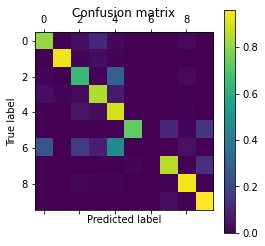

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(fs_mnist_data.test_labels,test_preds_fs)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sum = 0
count = 0
for i in cm.diagonal():
    sum = sum + i
    count = count + 1

average = sum / count

print("Average Accuracy over Class Accuracy: ",average)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()